In [2]:

# In[0]: IMPORTS, SETTINGS
#region
import sys
assert sys.version_info >= (3, 5) # Python ≥3.5 is required
import sklearn
assert sklearn.__version__ >= "0.20" # Scikit-Learn ≥0.20 is required
import numpy as np
import os   
np.random.seed(42) # to output the same result across runs
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)       
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd") # Ignore useless warnings (see SciPy issue #5998)
font_size = 14
let_plot = True
#endregion


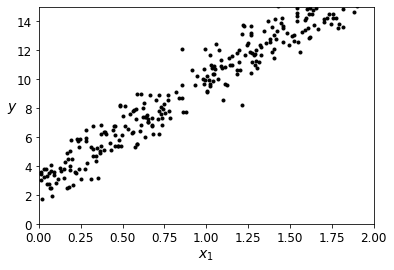

In [3]:
n_samples = 300
X = 2*np.random.rand(n_samples, 1) # random real numbers in [0,2]
y_no_noise = 3 + 7*X; 
y = y_no_noise + np.random.randn(n_samples, 1) # noise: random real numbers with Gaussian distribution of mean 0, variance 1

let_plot = True
if let_plot:
    plt.plot(X, y, "k.")
    plt.xlabel("$x_1$", fontsize=font_size)
    plt.ylabel("$y$", rotation=0, fontsize=font_size)
    plt.axis([0, 2, 0, 15])
    plt.savefig("generated_data_plot",format='png', dpi=300)
    plt.show()


In [4]:
X_add_x0 = np.c_[np.ones((n_samples, 1)), X]  # add x0 = 1 to each instance
theta_norm_eq = np.linalg.inv(X_add_x0.T @ X_add_x0) @ X_add_x0.T @ y 
# Note: Theta is a bit different from the true parameters due to the noise.

In [5]:
# 1.3. Try prediction 
X_test = np.array([[0], [2], [15], [24], [30]]) # 3 instances
X_test_add_x0 = np.c_[np.ones((len(X_test), 1)), X_test]  # add x0 = 1 to each instance
y_predict = X_test_add_x0 @ theta_norm_eq


In [6]:
y_predict

array([[  2.85592071],
       [ 17.11816777],
       [109.82277368],
       [174.00288546],
       [216.78962665]])

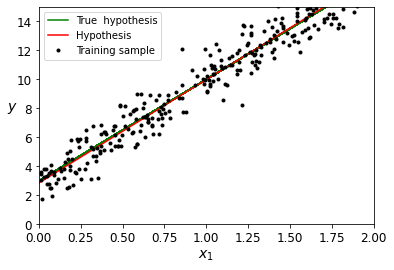

In [7]:
if let_plot:
    plt.plot(X, y_no_noise, "g-",label="True  hypothesis")
    plt.plot(X_test, y_predict, "r-",label='Hypothesis')
    plt.plot(X, y, "k.",label='Training sample')
    plt.axis([0, 2, 0, 15])
    plt.legend()    
    plt.xlabel("$x_1$", fontsize=font_size)
    plt.ylabel("$y$", rotation=0, fontsize=font_size)
    plt.show()	

In [8]:
data = []
eta = 0.1  # learning rate
m = len(X)
np.random.seed(42);
theta_random_init = np.random.randn(2,1)
theta = theta_random_init  # random initialization
#for iteration in range(1,1000) # use this if you want to stop after some no. of iterations, eg. 1000
while True:
	#gradients = 2/m * X_add_x0.T @ (X_add_x0 @ theta - y); # WARNING: @ (mat multiply) causes weird indent errors when running in Debug interactive
	gradients = (2/m) * X_add_x0.T .dot (X_add_x0 .dot (theta) - y); # works the same at the code above, but no indent errors
	
	theta = theta - eta*gradients
	data.append([gradients, theta])
	#print(np.abs(np.mean(eta*gradients)))
	if (np.abs(np.mean(eta*gradients)) < 0.000000001): 
		break # stop when the change of theta is small

# 2.3. Compare with theta by Normal Eq.
theta_norm_eq
theta_BGD = theta

print(data)


[[array([[-19.11775026],
       [-23.95594723]]), array([[2.40848918],
       [2.25733042]])], [array([[-10.54896211],
       [-13.81451046]]), array([[3.46338539],
       [3.63878147]])], [array([[-5.70276604],
       [-8.06051382]]), array([[4.03366199],
       [4.44483285]])], [array([[-2.96557143],
       [-4.7927665 ]]), array([[4.33021914],
       [4.9241095 ]])], [array([[-1.42309714],
       [-2.9340108 ]]), array([[4.47252885],
       [5.21751058]])], [array([[-0.55730345],
       [-1.87384502]]), array([[4.5282592 ],
       [5.40489508]])], [array([[-0.07466809],
       [-1.26639696]]), array([[4.53572601],
       [5.53153478]])], [array([[ 0.19111576],
       [-0.91568194]]), array([[4.51661443],
       [5.62310297]])], [array([[ 0.33427258],
       [-0.7106446 ]]), array([[4.48318717],
       [5.69416743]])], [array([[ 0.40818385],
       [-0.58835225]]), array([[4.44236879],
       [5.75300266]])], [array([[ 0.44308897],
       [-0.51313966]]), array([[4.39805989],
       

In [23]:
count = 0
for i in data:
  count += 1
print(count)

474


In [9]:
theta_norm_eq

array([[2.85592071],
       [7.13112353]])

In [10]:
theta_BGD 

array([[2.8559211],
       [7.1311232]])

In [1]:
def plot_gradient_descent(theta, eta, theta_path=None, n_iter_plot=10, n_iter_run=1000):
    m = len(X_add_x0)
    plt.plot(X, y, "k.")
    for iteration in range(1,n_iter_run): # run 1000 iter, instead of convergence stop
        if iteration <= n_iter_plot:
            y_predict = X_test_add_x0 .dot (theta) 
            if iteration == 1:
                plt.plot(X_test, y_predict, "g--", label="initial theta",linewidth=2)
            elif iteration == n_iter_plot: 
                plt.plot(X_test, y_predict, "r-", label="theta at 10th iter",linewidth=2)  
            else:
                plt.plot(X_test, y_predict, "b-",linewidth=2)                  
        gradients = 2/m * X_add_x0.T .dot (X_add_x0 .dot (theta) - y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=font_size)
    plt.axis([0, 2, 0, 15])
    plt.legend(loc='upper right');
    plt.title(r"$\eta = {}$".format(eta), fontsize=font_size)

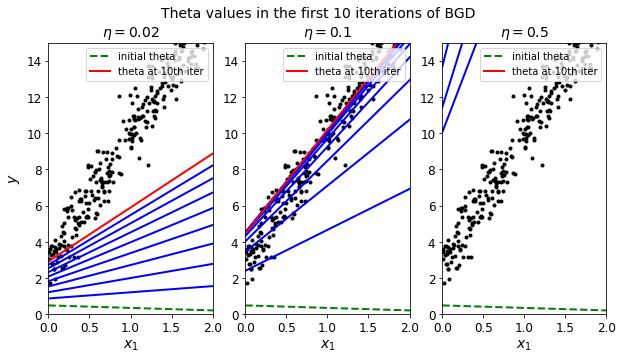

In [11]:
# 2.5.1. Plot BGD  with small learning rate
np.random.seed(42)
init_theta = np.random.randn(2,1)  # random initialization
fig = plt.figure(figsize=(10,5))
plt.subplot(131);
plot_gradient_descent(init_theta, eta=0.02); plt.ylabel("$y$", fontsize=font_size)

# 2.5.2. Plot BGD with good learning rate 
plt.subplot(132); 
theta_path_bgd = [theta_random_init]
plot_gradient_descent(init_theta, eta=0.1, theta_path=theta_path_bgd)

# 2.5.3. Plot BGD with large learning rate
plt.subplot(133); 
plot_gradient_descent(init_theta, eta=0.5)
fig.suptitle("Theta values in the first 10 iterations of BGD", fontsize=14)
plt.show()

In [12]:
def learning_schedule(t):
    alpha = 0.2; t0 = 50; # learning schedule hyperparameters
    eta = 1 / (alpha* (t + t0))
    return eta


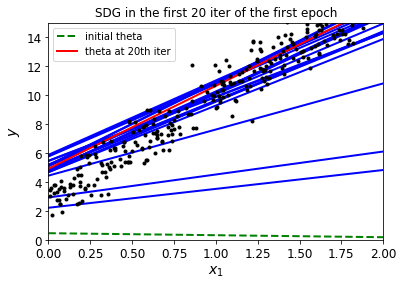

In [13]:
m = len(X_add_x0)
theta = theta_random_init  # random initialization
theta_path_sgd = [theta_random_init]  

n_epochs = 50 # << 1 epoch = 1 time of running m iter (m: no. of training samples)
for epoch in range(n_epochs):
    for i in range(m):
        # Just for plotting purpose
        if epoch == 0 and i <= 20:                       
            y_predict = X_test_add_x0.dot(theta)   
            if i == 0:
                plt.plot(X_test, y_predict, "g--", label="initial theta",linewidth=2)
            elif i == 20: 
                plt.plot(X_test, y_predict, "r-", label="theta at 20th iter",linewidth=2)  
            else:
                plt.plot(X_test, y_predict, "b-",linewidth=2)     
        # Pick a random sample
        random_index = np.random.randint(m)
        xi = np.array([X_add_x0[random_index]])
        yi = np.array([y[random_index]])
        # Compute gradients
        gradients = 2 * xi.T .dot (xi .dot (theta) - yi)
        # Compute learning rate
        eta = learning_schedule(m*epoch + i)
        # Update theta
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)        
plt.plot(X, y, "k.")                                 
plt.xlabel("$x_1$", fontsize=font_size)                   
plt.ylabel("$y$", fontsize=font_size)            
plt.axis([0, 2, 0, 15])  
plt.legend()
plt.title('SDG in the first 20 iter of the first epoch')
plt.show()  

In [14]:
print(theta_BGD)
theta_SGD = theta
print(theta_SGD)

[[2.8559211]
 [7.1311232]]
[[2.88860485]
 [7.12882372]]


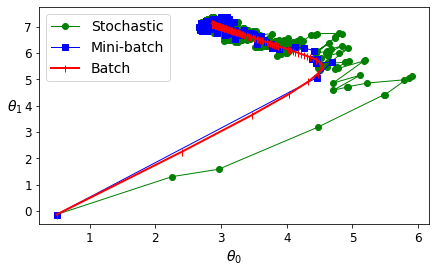

In [15]:
def learning_schedule(t):
    t0, t1 = 200, 1000
    return t0 / (t + t1)

n_epochs = 50
minibatch_size = 20
theta = theta_random_init  # random initialization
theta_path_mgd = [theta_random_init]
t = 0           
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_addx0_shuffled = X_add_x0[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        # Get random samples
        xi = X_addx0_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T .dot (xi .dot (theta) - yi)
        # Compute learning rate
        t += 1
        eta = learning_schedule(t)
        # Update theta
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

# 4.3. Plot update paths of BGD, SGD, and Mini-batch GB
if let_plot:
    theta_path_bgd = np.array(theta_path_bgd)
    theta_path_sgd = np.array(theta_path_sgd)
    theta_path_mgd = np.array(theta_path_mgd)

    plt.figure(figsize=(7,4))
    plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "g-o", linewidth=1, label="Stochastic")
    plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "b-s", linewidth=1, label="Mini-batch")
    plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "r-|",markersize=7, linewidth=2, label="Batch")
    plt.legend(loc="upper left", fontsize=font_size)
    plt.xlabel(r"$\theta_0$", fontsize=font_size)
    plt.ylabel(r"$\theta_1$   ", fontsize=font_size, rotation=0)
    #plt.axis([2.5, 4.5, 2.3, 3.9])   
    plt.show()

# 4.4. Comparison of training algorithms (>> see slide) 
print("\n")

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# Training
lin_reg.fit(X, y.ravel()) # ravel(): convert to 1D array                  
# Learned parameters (theta)
lin_reg.intercept_, lin_reg.coef_   
# Compare with theta by previous implementation
theta_norm_eq 
# Prediction
lin_reg.predict(X_test)            

# 5.2. Sklearn implementation of Stochastic Gradient Descent 
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-9, learning_rate='optimal', alpha=0.2, random_state=42, penalty=None)
# Training
sgd_reg.fit(X, y.ravel())
# Learned parameters (theta)
sgd_reg.intercept_, sgd_reg.coef_
# Compare with theta by previous implementation
theta_SGD # different result due to no control on t0 in the learning schedule.
# Prediction
sgd_reg.predict(X_test)   

C:\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([  2.89797213,  17.08882972, 109.32940404, 173.18826318,
       215.76083595])

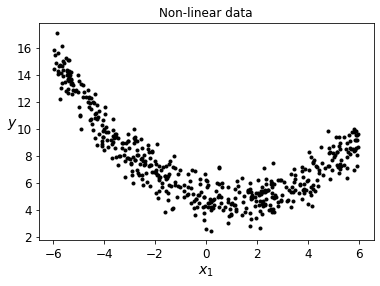

In [107]:
m = 500
np.random.seed(30);
X = 12*np.random.rand(m, 1) - 6  # -6 < X < 6
y = (1/5)*X**2 - (1/2)*X + 5 + np.random.randn(m, 1)
if let_plot:
    plt.plot(X, y, "k.")
    plt.xlabel("$x_1$", fontsize=font_size)
    plt.ylabel("$y$", rotation=0, fontsize=font_size)
    #plt.axis([-3, 3, 0, 10])
    plt.title("Non-linear data")
    plt.show()

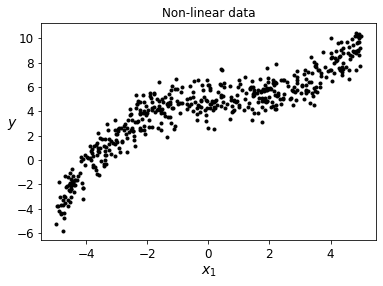

In [105]:
m = 500
np.random.seed(30);
X = 10*np.random.rand(m, 1) - 5  # -6 < X < 6
y = (1/20)*X**3  - (1/10)*X**2 + (1/5)*X + 5 + np.random.randn(m, 1)
if let_plot:
    plt.plot(X, y, "k.")
    plt.xlabel("$x_1$", fontsize=font_size)
    plt.ylabel("$y$", rotation=0, fontsize=font_size)
    #plt.axis([-3, 3, 0, 10])
    plt.title("Non-linear data")
    plt.show()


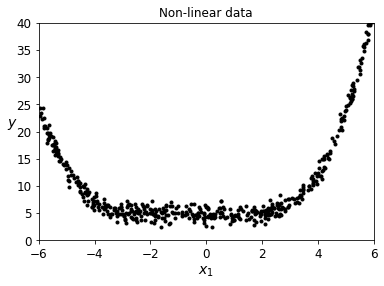

In [88]:
m = 500
np.random.seed(30);
X = 12*np.random.rand(m, 1) - 6  # -6 < X < 6
y = 0.025*X**4 + (1/20)*X**3  - (1/10)*X**2 - (1/5)*X + 5 + np.random.randn(m, 1)
if let_plot:
    plt.plot(X, y, "k.")
    plt.xlabel("$x_1$", fontsize=font_size)
    plt.ylabel("$y$", rotation=0, fontsize=font_size)
    plt.axis([-6, 6, 0, 40])
    plt.title("Non-linear data")
    plt.show()

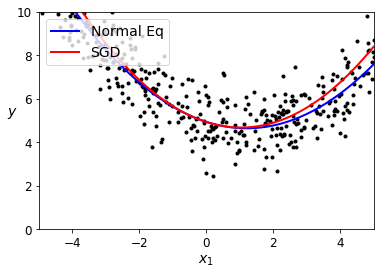

In [104]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
# Look at a sample
X[0]           
X_poly[0]

# 6.3. Train using Normal Equation
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_  # theta

# 6.4. Train using SGD
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-9, random_state=42, penalty=None)
sgd_reg.fit(X_poly, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_ # theta

# 6.5. Prediction and plot learned models
X_test=np.linspace(-5, 5, 100).reshape(100, 1)
X_test_poly = poly_features.transform(X_test)
y_test_norm_eq = lin_reg.predict(X_test_poly)
y_test_SGD = sgd_reg.predict(X_test_poly)
if let_plot:
    plt.plot(X, y, "k.")
    plt.plot(X_test, y_test_norm_eq, "b-", linewidth=2, label="Normal Eq")
    plt.plot(X_test, y_test_SGD, "r-", linewidth=2, label="SGD")
    plt.xlabel("$x_1$", fontsize=font_size)
    plt.ylabel("$y$", rotation=0, fontsize=font_size)
    plt.legend(loc="upper left", fontsize=font_size)
    plt.axis([-5, 5, 0, 10])
    plt.show()

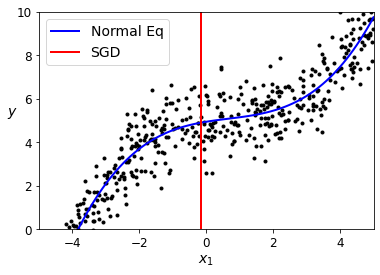

In [106]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
# Look at a sample
X[0]           
X_poly[0]

# 6.3. Train using Normal Equation
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_  # theta

# 6.4. Train using SGD
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-9, random_state=42, penalty=None)
sgd_reg.fit(X_poly, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_ # theta

# 6.5. Prediction and plot learned models
X_test=np.linspace(-5, 5, 100).reshape(100, 1)
X_test_poly = poly_features.transform(X_test)
y_test_norm_eq = lin_reg.predict(X_test_poly)
y_test_SGD = sgd_reg.predict(X_test_poly)
if let_plot:
    plt.plot(X, y, "k.")
    plt.plot(X_test, y_test_norm_eq, "b-", linewidth=2, label="Normal Eq")
    plt.plot(X_test, y_test_SGD, "r-", linewidth=2, label="SGD")
    plt.xlabel("$x_1$", fontsize=font_size)
    plt.ylabel("$y$", rotation=0, fontsize=font_size)
    plt.legend(loc="upper left", fontsize=font_size)
    plt.axis([-5, 5, 0, 10])
    plt.show()

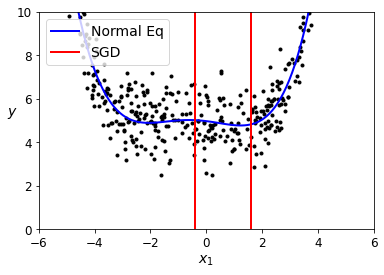

In [102]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)
# Look at a sample
X[0]           
X_poly[0]

# 6.3. Train using Normal Equation
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_  # theta

# 6.4. Train using SGD
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-9, random_state=60, penalty=None)
sgd_reg.fit(X_poly, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_ # theta

# 6.5. Prediction and plot learned models
X_test=np.linspace(-5, 5, 100).reshape(100, 1)
X_test_poly = poly_features.transform(X_test)
y_test_norm_eq = lin_reg.predict(X_test_poly)
y_test_SGD = sgd_reg.predict(X_test_poly)
if let_plot:
    plt.plot(X, y, "k.")
    plt.plot(X_test, y_test_norm_eq, "b-", linewidth=2, label="Normal Eq")
    plt.plot(X_test, y_test_SGD, "r-", linewidth=2, label="SGD")
    plt.xlabel("$x_1$", fontsize=font_size)
    plt.ylabel("$y$", rotation=0, fontsize=font_size)
    plt.legend(loc="upper left", fontsize=font_size)
    plt.axis([-6, 6, 0, 10])
    plt.show()

C:\Python310\lib\site-packages\sklearn\utils\extmath.py:1014: RuntimeWarning: overflow encountered in square
  temp **= 2


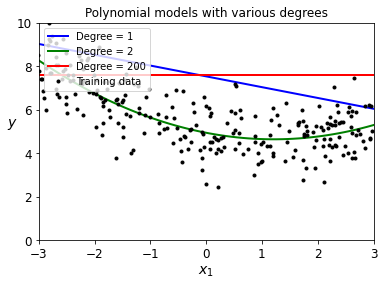

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
for degree, plot_style in ((1, "b-"), (2, "g-"), (200, "r-")):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg)     ])
    polynomial_regression.fit(X, y)
    y_test = polynomial_regression.predict(X_test)
    plt.plot(X_test, y_test, plot_style, label="Degree = " + str(degree), linewidth=2)
plt.plot(X, y, "k.", label="Training data")
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=font_size)
plt.ylabel("$y$", rotation=0, fontsize=font_size)
plt.axis([-3, 3, 0, 10])
plt.title("Polynomial models with various degrees")
plt.show()

In [110]:
# 7.3. Plot learning curves function
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    # Split training, validation sets:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)
    
    # Repeat training on m sizes of training data: time 1: use 1 sample; time 2: use 2 samples... for training
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-", linewidth=3, label="training")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
    plt.legend(loc="upper right", fontsize=font_size)    
    plt.xlabel("Training set size", fontsize=font_size)  
    plt.ylabel("Mean squared error", fontsize=font_size)   


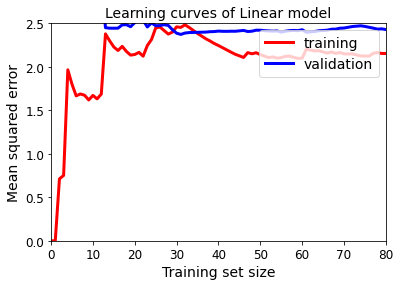

In [112]:
# 7.4. Learning curve of Linear model
lin_reg = LinearRegression()
if let_plot:
    plot_learning_curves(lin_reg, X, y)
    plt.title("Learning curves of Linear model", fontsize=font_size)
    plt.axis([0, 80, 0, 2.5])   
    plt.savefig("learn_curve_linear.png")
    plt.show()     


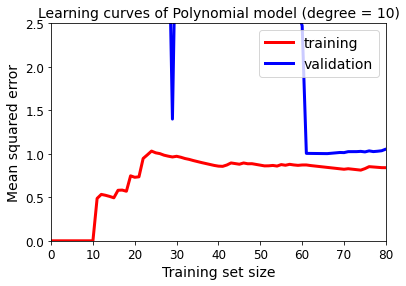

In [113]:

# 7.6. Learning curve of Polynomial model (degree = 10)
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()) ])
if let_plot:
    plot_learning_curves(polynomial_regression, X, y)
    plt.title("Learning curves of Polynomial model (degree = 10)", fontsize=font_size)
    plt.axis([0, 80, 0, 2.5])           
    plt.savefig("learn_curve_poly_10.png")
    plt.show()      

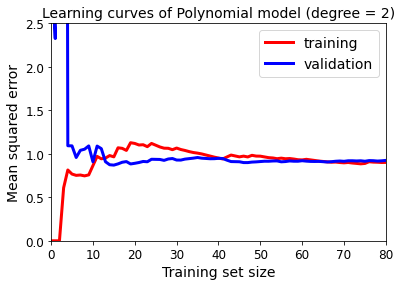

In [114]:

# 7.8. Learning curve of Polynomial model (degree = 2)    
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()) ])
if let_plot:
    plot_learning_curves(polynomial_regression, X, y)
    plt.title("Learning curves of Polynomial model (degree = 2)", fontsize=font_size)
    plt.axis([0, 80, 0, 2.5])           
    plt.savefig("learn_curve_poly_2.png")
    plt.show()     